## Is there any correlation between the number of words and the number of views a post has?

#### To give an answer to that questions, first we're going to import the libraries we are going to work with.

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
pd.options.plotting.backend = 'plotly'

Now, let's import and take a look at the data

In [50]:
# Path of the file
path_data = './../output/B_relacion_cantidad_palabras_y_vistas.csv'

# Df
df = pd.read_csv(path_data)
df.shape

(56974, 2)

as wee see, we have two columns: number_of_words and views.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56974 entries, 0 to 56973
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   number_of_words  56974 non-null  int64
 1   views            56974 non-null  int64
dtypes: int64(2)
memory usage: 890.3 KB


#### Now, let's see the distribution of variable separately

##### Number_of_words

In [26]:
df.plot(x='number_of_words', kind = 'hist')

As we have numbers so large, we are going to use their log form to visualize in a bettter way.

In [75]:
df['log_number_of_words'] =  np.log1p(df['number_of_words'])

In [76]:
df.plot.hist(x = 'log_number_of_words')

Looking at the plot, we can easily determinate that the data for this variables doesn't fit to the normal distribution.

Let's obtain some statistics from number_of_words column. We have to be concerned about the presence of outliers into the data, since they can bias our results.

To avoid bias, we're going to use more robust metrics, like trimmed mean and MAD.

In [59]:
number_words_mean = stats.trim_mean(df['number_of_words'], 0.1)
number_words_std = df.number_of_words.mad()

In [65]:
print('Mean for number_of_words:', number_words_mean)
print('Mean Absolute Deviation for number_of_words:', number_words_std)

Mean for number_of_words: 49.78835015357613
Mean Absolute Deviation for number_of_words: 45.177799156203996


In [74]:
df.log_number_of_

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56974 entries, 0 to 56973
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   number_of_words  56974 non-null  int64  
 1   views            56974 non-null  int64  
 2   log_views        56974 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 1.3 MB


##### Views

In [67]:
df.plot.hist(x = 'views')

In the case of views, data is more skewed. Even we can se any shape into the graph.

In [68]:
df['log_views'] = np.log(df['views'])

/Users/giovannileon/.pyenv/versions/3.8.11/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning:

divide by zero encountered in log



In order to have a better representation of the distribution of the data, we're going to use log transformation.

In [69]:
df.plot.hist(x='log_views')

Taking a look at the graph, we can notice that the distribution of the log_views fits better to the normal distribution than the log_number_of_words

Now let's extract some metrics

In [78]:
view_mean = stats.trim_mean(df['views'], 0.1)
view_mad = df['views'].mad()

In [79]:
print('Mean for views:', view_mean)
print('Mean Absolute Deviation for views:', view_mad)

Mean for views: 13.418582711715665
Mean Absolute Deviation for views: 63.487428799464354


The standart deviation is too large, what means that this data is very skewed.

### Correlation between number_of_words and views

##### Scatter plot

In [81]:
df.plot(x = 'number_of_words', y = 'views', kind = 'scatter', title = 'number_of_words vs views')


In [83]:
df.plot(x = 'log_number_of_words', y = 'log_views', kind = 'scatter', title = 'log_number_of_words vs log_views')

After to graph the two version of the features (log and not log), we can say that there is no statistical correlation between them.

Even we can use a more mathematical way to prove it.

In [96]:
no_logs = df['number_of_words'].corr(df['views'])

In [94]:
print('correlation between number_of_words vs views:', no_logs)

correlation between number_of_words vs views: 0.06942398260590721


<AxesSubplot:>

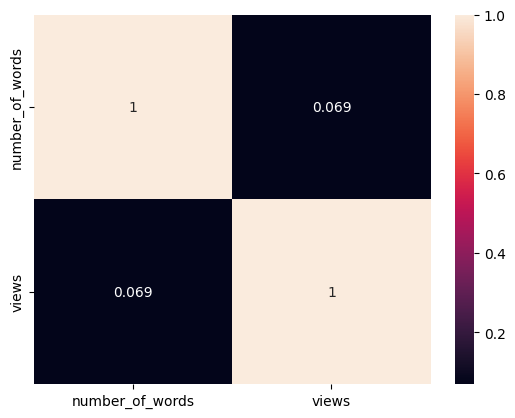

In [95]:
sns.heatmap(df[['number_of_words', 'views']].corr(), annot = True)